In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

In [2]:
columns = ["Technology","Power"]
columns
df = pd.DataFrame()

In [3]:
def create_array(file_name,file_num,csv_name,column,category,expr=None):
    matrix = [[0 for x in range(len(file_num))] for y in range(len(category))] 
    for num in file_num:
        df = pd.read_csv(f"../{file_name + str(num)}/{csv_name}")
        if expr is not None:
            df = df.query(expr)
        value = df.groupby([column])["value"].sum()
        for cat in category:
            i_cat = category.index(cat)
            i_num = file_num.index(num)
            try:
                matrix[i_cat][i_num] = value[cat]
            except:
                print(f"no value for {cat} in {num}")
                continue

    return matrix

def create_obj_curve(file_name,file_num):
    matrix = [0 for x in range(len(file_num))]
    for num in file_num:
        with open(f"../{file_name + str(num)}/objective.txt", 'r') as file:
            # Read the entire file content 
            i_num = file_num.index(num)
            matrix[i_num] = float(file.read())
            
    return matrix

def to_percent(file_num,base_value):
    matrix = [0 for x in range(len(file_num))]
    for num in file_num:
        i_num = file_num.index(num)
        matrix[i_num] = round((num-base_value)*100/base_value)
    
    return matrix

def reverse_legend(ax):
    current_handles, current_labels = ax.get_legend_handles_labels()

    # sort or reorder the labels and handles
    reversed_handles = list(reversed(current_handles))
    reversed_labels = list(reversed(current_labels))

    # call plt.legend() with the new values
    plt.legend(reversed_handles,reversed_labels, loc='upper left',
          ncol=2, fancybox=True, shadow=True)

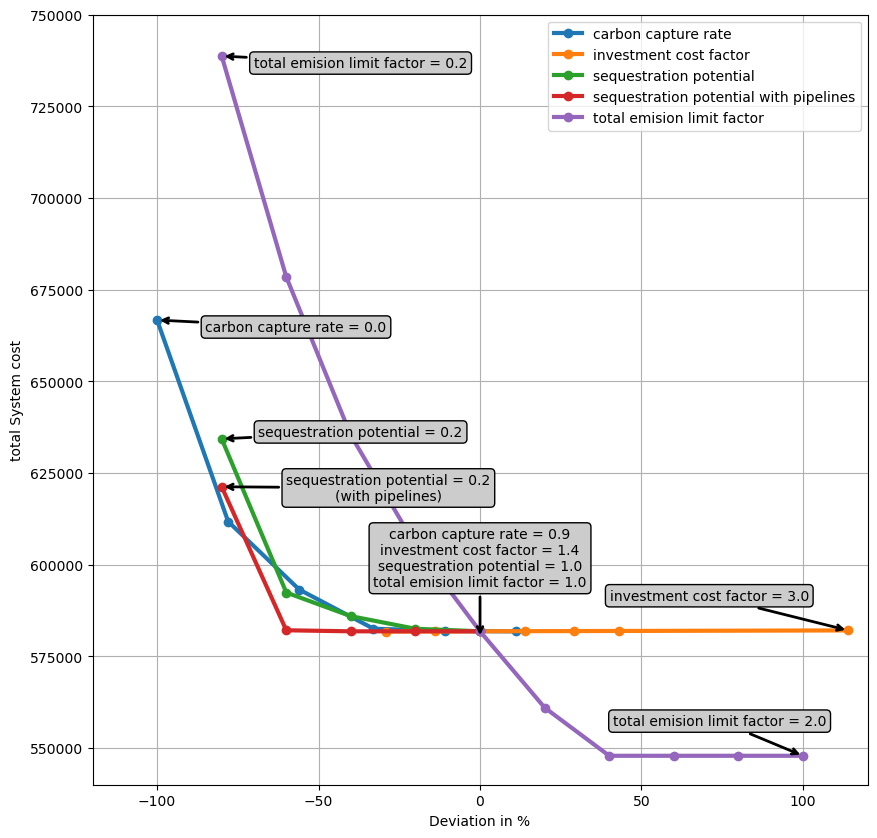

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))

file_name = "Results capture_rate"
file_num = [0.0,0.2,0.4,0.6,0.8,1.0]
base_value = 0.9

x = to_percent(file_num,base_value)
y = create_obj_curve(file_name,file_num)

file_name = "Results inv_cost"
file_num = [1.0,1.2,1.4,1.6,1.8,2.0,3.0]
base_value = 1.4

x1 = to_percent(file_num,base_value)
y1 = create_obj_curve(file_name,file_num)

file_name = "Results seq_lim"
file_num = [0.2,0.4,0.6,0.8,1.0]
base_value = 1.0

x2 = to_percent(file_num,base_value)
y2 = create_obj_curve(file_name,file_num)

file_name = "Results test_trade seq_lim"
file_num = [0.2,0.4,0.6,0.8,1.0]
base_value = 1.0

x3 = to_percent(file_num,base_value)
y3 = create_obj_curve(file_name,file_num)

file_name = "results CO2L"
file_num = [2.0,1.8,1.6,1.4,1.2,1.0,0.8,0.6,0.4,0.2]
base_value = 1.0

x4 = to_percent(file_num,base_value)
y4 = create_obj_curve(file_name,file_num)

plt.plot(x, y, '-o', linewidth=3, label="carbon capture rate")
plt.plot(x1, y1, '-o', linewidth=3, label="investment cost factor")
plt.plot(x2, y2, '-o', linewidth=3, label="sequestration potential")
plt.plot(x3, y3, '-o', linewidth=3, label="sequestration potential with pipelines")
plt.plot(x4, y4, '-o', linewidth=3, label="total emision limit factor")

ax.set(xlim=(120, -120),
       ylim=(540000,750000), 
       xlabel="Deviation in %", 
       ylabel="total System cost")

ax.grid()
plt.legend()
plt.gca().invert_xaxis()

ax.annotate('carbon capture rate = 0.9\ninvestment cost factor = 1.4\nsequestration potential = 1.0\ntotal emision limit factor = 1.0',
             xy=(0,580000),
             xytext=(0, 80), textcoords='offset points',
             ha="center", va="top",
             bbox=dict(boxstyle="round", fc="0.8"),
             arrowprops=dict(arrowstyle="->",linewidth=2))

ax.annotate('carbon capture rate = 0.0',
             xy=(-100,666734),
             xytext=(100,0), textcoords='offset points',
             ha="center", va="top",
             bbox=dict(boxstyle="round", fc="0.8"),
             arrowprops=dict(arrowstyle="->",linewidth=2))

ax.annotate('sequestration potential = 0.2',
             xy=(-80,634329),
             xytext=(100,10), textcoords='offset points',
             ha="center", va="top",
             bbox=dict(boxstyle="round", fc="0.8"),
             arrowprops=dict(arrowstyle="->",linewidth=2))

ax.annotate('sequestration potential = 0.2\n(with pipelines)',
             xy=(-80,621259),
             xytext=(120,10), textcoords='offset points',
             ha="center", va="top",
             bbox=dict(boxstyle="round", fc="0.8"),
             arrowprops=dict(arrowstyle="->",linewidth=2))

ax.annotate('investment cost factor = 3.0',
             xy=(114,582084),
             xytext=(-100,30), textcoords='offset points',
             ha="center", va="top",
             bbox=dict(boxstyle="round", fc="0.8"),
             arrowprops=dict(arrowstyle="->",linewidth=2))

ax.annotate('total emision limit factor = 2.0',
             xy=(100,547893),
             xytext=(-60,30), textcoords='offset points',
             ha="center", va="top",
             bbox=dict(boxstyle="round", fc="0.8"),
             arrowprops=dict(arrowstyle="->",linewidth=2))

ax.annotate('total emision limit factor = 0.2',
             xy=(-80,738727),
             xytext=(100,0), textcoords='offset points',
             ha="center", va="top",
             bbox=dict(boxstyle="round", fc="0.8"),
             arrowprops=dict(arrowstyle="->",linewidth=2))

plt.savefig('total_system.svg')

no value for BECCS in 2.0
no value for CoalPowerPlantCC in 2.0
no value for BECCS in 1.8
no value for CoalPowerPlantCC in 1.8
no value for BECCS in 1.6
no value for CoalPowerPlantCC in 1.6
no value for BECCS in 1.4
no value for CoalPowerPlantCC in 1.4
no value for BECCS in 1.2
no value for GasPowerPlantCC in 1.2
no value for CoalPowerPlantCC in 1.2
no value for BECCS in 1.0
no value for CoalPowerPlantCC in 1.0
no value for CoalPowerPlantCC in 0.8
no value for CoalPowerPlantCC in 0.6
no value for CoalPowerPlantCC in 0.4
no value for CoalPowerPlantCC in 0.2


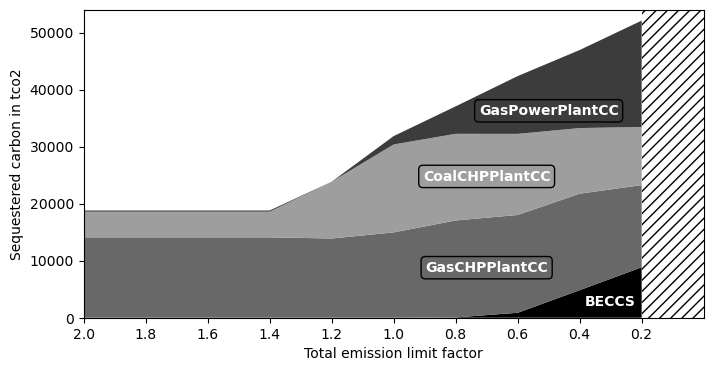

In [6]:
file_name = "results CO2L"
file_num = [2.0,1.8,1.6,1.4,1.2,1.0,0.8,0.6,0.4,0.2]
csv_name = "sequester.csv"
column = 'Technology'
category = ["BECCS","GasCHPPlantCC","CoalCHPPlantCC","GasPowerPlantCC","CoalPowerPlantCC"]
color_map = ["#000000","#686868","#9E9E9E","#3C3C3C","#282828"]

x = np.asarray(file_num)
y = create_array(file_name,file_num,csv_name,column,category)

# plot
fig, ax = plt.subplots(figsize=(8, 4))

ax.stackplot(x, y, colors = color_map)

ax.set(xlim=(0, 2),ylim=(0,54000), xlabel="Total emission limit factor", ylabel="Sequestered carbon in tco2")
ax.fill_between([0,0.2],55000,fc="white",hatch='///')

ax.annotate('BECCS',(0.3,4000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#000000"))
ax.annotate("GasCHPPlantCC",(0.7,10000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#686868"))
ax.annotate("CoalCHPPlantCC",(0.7,26000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#9E9E9E"))
ax.annotate("GasPowerPlantCC",(0.5,37500),color="white", weight='bold',ha="center", va="top",
           bbox=dict(boxstyle="round",fc="#3C3C3C"))

plt.gca().invert_xaxis()
plt.xticks(file_num);

plt.savefig('total_emission_limit_factor_CO2.svg')

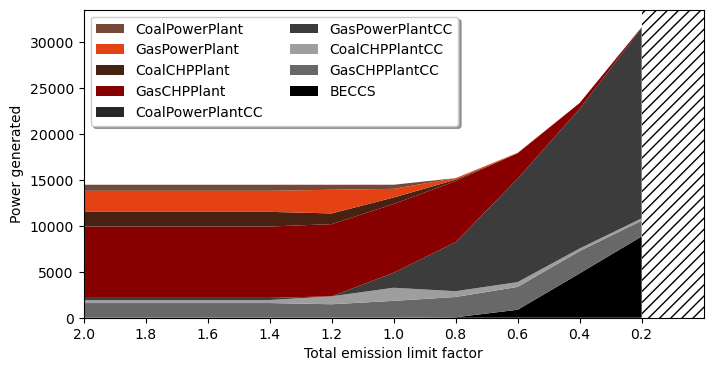

In [7]:
file_name = "results CO2L"
file_num = [2.0,1.8,1.6,1.4,1.2,1.0,0.8,0.6,0.4,0.2]
csv_name = "production.csv"
column = 'Technology'
expr = "Fuel == 'Power'"
category = ["BECCS","GasCHPPlantCC","CoalCHPPlantCC","GasPowerPlantCC","CoalPowerPlantCC","GasCHPPlant","CoalCHPPlant","GasPowerPlant","CoalPowerPlant"]
color_map = ["#000000","#686868","#9E9E9E","#3C3C3C","#282828","#880000","#472111","#e54213","#754937"]

x = np.asarray(file_num)
y = create_array(file_name,file_num,csv_name,column,category,expr=expr)

# plot
fig, ax = plt.subplots(figsize=(8, 4))

ax.stackplot(x, y, colors = color_map, labels = category)

ax.set(xlim=(0, 2),ylim=(0,33500), xlabel="Total emission limit factor", ylabel="Power generated")
ax.fill_between([0,0.2],45000,fc="white",hatch='///')

plt.gca().invert_xaxis()
plt.xticks(file_num);

reverse_legend(ax)

plt.savefig('total_emission_limit_factor_Power.svg')

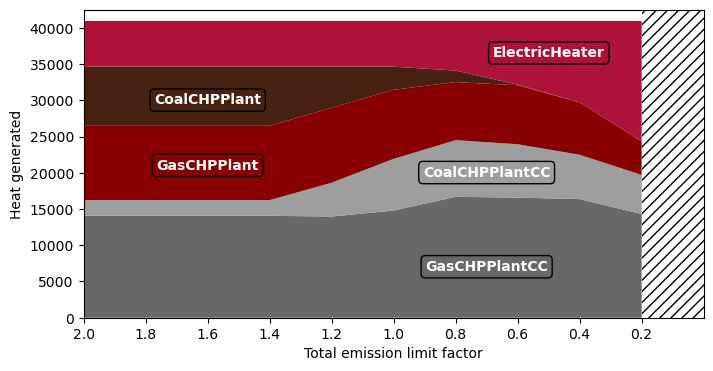

In [8]:
file_name = "results CO2L"
file_num = [2.0,1.8,1.6,1.4,1.2,1.0,0.8,0.6,0.4,0.2]
csv_name = "production.csv"
column = 'Technology'
expr = "Fuel == 'Heat'"
category = ["GasCHPPlantCC","CoalCHPPlantCC","GasCHPPlant","CoalCHPPlant","ElectricHeater"]
color_map = ["#686868","#9E9E9E","#880000","#472111","#ae123a"]

x = np.asarray(file_num)
y = create_array(file_name,file_num,csv_name,column,category,expr=expr)

# plot
fig, ax = plt.subplots(figsize=(8, 4))

ax.stackplot(x, y, colors = color_map)

ax.set(xlim=(0, 2),ylim=(0,42500), xlabel="Total emission limit factor", ylabel="Heat generated")
ax.fill_between([0,0.2],45000,fc="white",hatch='///')

ax.annotate("GasCHPPlantCC",(0.7,8000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#686868"))
ax.annotate("CoalCHPPlantCC",(0.7,21000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#9E9E9E"))
ax.annotate("GasCHPPlant",(1.6,22000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#880000"))
ax.annotate("CoalCHPPlant",(1.6,31000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#472111"))
ax.annotate("ElectricHeater",(0.5,37500),color="white", weight='bold',ha="center", va="top",
           bbox=dict(boxstyle="round",fc="#ae123a"))

plt.gca().invert_xaxis()
plt.xticks(file_num);

plt.savefig('total_emission_limit_factor_Heat.svg')

no value for BECCS in 1.0
no value for CoalPowerPlantCC in 1.0
no value for CoalPowerPlantCC in 0.8
no value for CoalPowerPlantCC in 0.4
no value for CoalPowerPlantCC in 0.2
no value for GasCHPPlantCC in 0.0
no value for CoalCHPPlantCC in 0.0
no value for GasPowerPlantCC in 0.0
no value for CoalPowerPlantCC in 0.0


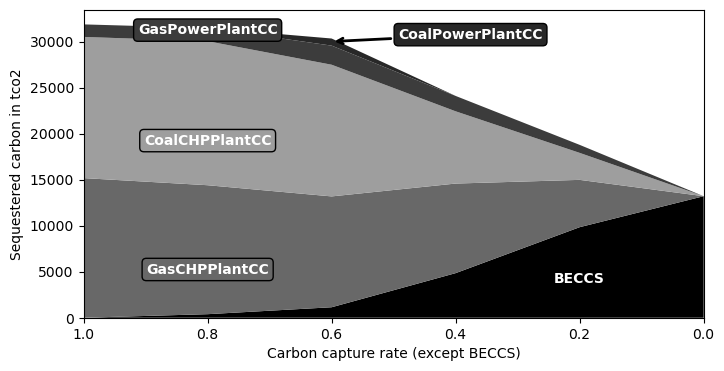

In [9]:
file_name = "Results capture_rate"
file_num = [1.0,0.8,0.6,0.4,0.2,0.0]
csv_name = "sequester.csv"
column = 'Technology'
category = ["BECCS","GasCHPPlantCC","CoalCHPPlantCC","GasPowerPlantCC","CoalPowerPlantCC"]
color_map = ["#000000","#686868","#9E9E9E","#3C3C3C","#282828"]

x = np.asarray(file_num)
y = create_array(file_name,file_num,csv_name,column,category)

# plot
fig, ax = plt.subplots(figsize=(8, 4))

ax.stackplot(x, y, colors = color_map)

ax.set(xlim=(0, 1), xlabel="Carbon capture rate (except BECCS)", ylabel="Sequestered carbon in tco2")

ax.annotate('BECCS',(0.2,5000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#000000"))
ax.annotate("GasCHPPlantCC",(0.8,6000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#686868"))
ax.annotate("CoalCHPPlantCC",(0.8,20000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#9E9E9E"))
ax.annotate("GasPowerPlantCC",(0.8,32000),color="white", weight='bold',ha="center", va="top",
           bbox=dict(boxstyle="round",fc="#3C3C3C"))
ax.annotate("CoalPowerPlantCC",(0.6,30000),color="white", weight='bold',ha="center", va="top",
            xytext=(100,10), textcoords='offset points',
           bbox=dict(boxstyle="round",fc="#282828"),
            arrowprops=dict(arrowstyle="->",linewidth=2))

plt.gca().invert_xaxis()

plt.savefig('capture_rate_CO2.svg')

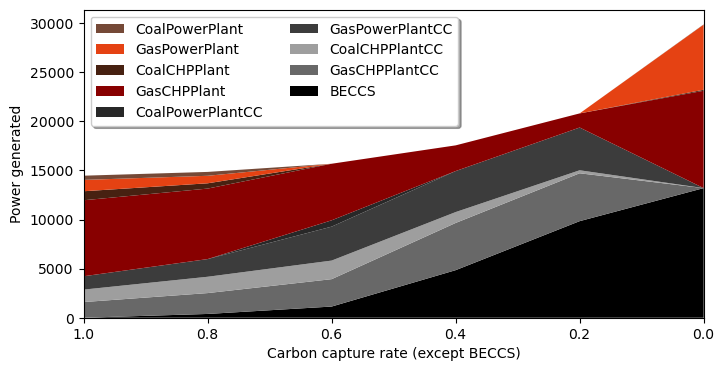

In [10]:
file_name = "Results capture_rate"
file_num = [1.0,0.8,0.6,0.4,0.2,0.0]
csv_name = "production.csv"
column = 'Technology'
expr = "Fuel == 'Power'"
category = ["BECCS","GasCHPPlantCC","CoalCHPPlantCC","GasPowerPlantCC","CoalPowerPlantCC","GasCHPPlant","CoalCHPPlant","GasPowerPlant","CoalPowerPlant"]
color_map = ["#000000","#686868","#9E9E9E","#3C3C3C","#282828","#880000","#472111","#e54213","#754937"]

x = np.asarray(file_num)
y = create_array(file_name,file_num,csv_name,column,category,expr=expr)

# plot
fig, ax = plt.subplots(figsize=(8, 4))

ax.stackplot(x, y, colors = color_map, labels = category)

ax.set(xlim=(0, 1), xlabel="Carbon capture rate (except BECCS)", ylabel="Power generated")

plt.gca().invert_xaxis()

reverse_legend(ax)

plt.savefig('capture_rate_Power.svg')

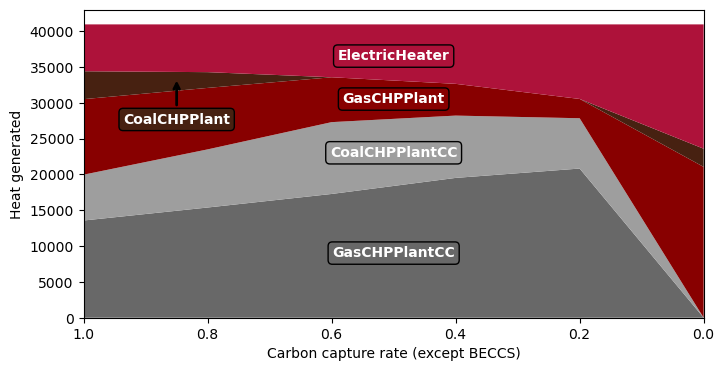

In [11]:
file_name = "Results capture_rate"
file_num = [1.0,0.8,0.6,0.4,0.2,0.0]
csv_name = "production.csv"
column = 'Technology'
expr = "Fuel == 'Heat'"
category = ["GasCHPPlantCC","CoalCHPPlantCC","GasCHPPlant","CoalCHPPlant","ElectricHeater"]
color_map = ["#686868","#9E9E9E","#880000","#472111","#ae123a"]

x = np.asarray(file_num)
y = create_array(file_name,file_num,csv_name,column,category,expr=expr)

# plot
fig, ax = plt.subplots(figsize=(8, 4))

ax.stackplot(x, y, colors = color_map)

ax.set(xlim=(0, 1), xlabel="Carbon capture rate (except BECCS)", ylabel="Heat generated")

ax.annotate("GasCHPPlantCC",(0.5,10000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#686868"))
ax.annotate("CoalCHPPlantCC",(0.5,24000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#9E9E9E"))
ax.annotate("GasCHPPlant",(0.5,31500),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#880000"))
ax.annotate("CoalCHPPlant",(0.85,33500),color="white", weight='bold',ha="center", va="top",
            xytext=(0,-25), textcoords='offset points',
            bbox=dict(boxstyle="round",fc="#472111"),
            arrowprops=dict(arrowstyle="->",linewidth=2))
ax.annotate("ElectricHeater",(0.5,37500),color="white", weight='bold',ha="center", va="top",
           bbox=dict(boxstyle="round",fc="#ae123a"))

plt.gca().invert_xaxis()

plt.savefig('capture_rate_Heat.svg')

no value for BECCS in 1.0
no value for BECCS in 1.2
no value for CoalPowerPlantCC in 1.2
no value for BECCS in 1.4
no value for CoalPowerPlantCC in 1.4
no value for BECCS in 1.6
no value for CoalPowerPlantCC in 1.6
no value for BECCS in 1.8
no value for CoalPowerPlantCC in 1.8
no value for BECCS in 2.0
no value for CoalPowerPlantCC in 2.0
no value for CoalPowerPlantCC in 3.0
no value for CoalPowerPlantCC in 6.0
no value for CoalPowerPlantCC in 12.0


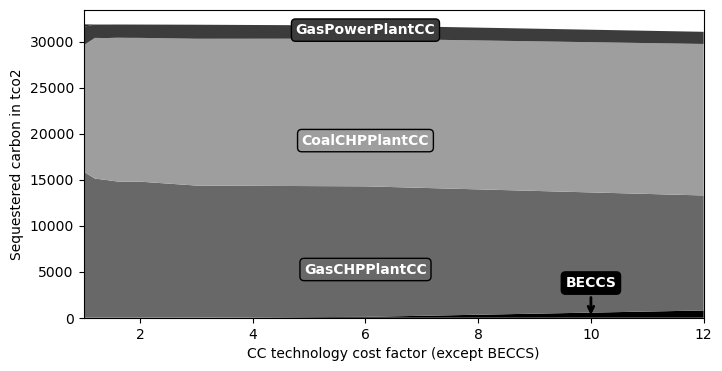

In [12]:
file_name = "Results inv_cost"
file_num = [1.0,1.2,1.4,1.6,1.8,2.0,3.0,6.0,12.0]
csv_name = "sequester.csv"
column = 'Technology'
category = ["BECCS","GasCHPPlantCC","CoalCHPPlantCC","GasPowerPlantCC","CoalPowerPlantCC"]
color_map = ["#000000","#686868","#9E9E9E","#3C3C3C","#282828"]

x = np.asarray(file_num)
y = create_array(file_name,file_num,csv_name,column,category)

# plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.stackplot(x, y, colors = color_map)
ax.set(xlim=(1.0, 12.0), xlabel="CC technology cost factor (except BECCS)", ylabel="Sequestered carbon in tco2")

ax.annotate('BECCS',(10,0),color="white", weight='bold',ha="center", va="top",
            xytext=(0,30), textcoords='offset points',
            bbox=dict(boxstyle="round",fc="#000000"),
            arrowprops=dict(arrowstyle="->",linewidth=2))
ax.annotate("GasCHPPlantCC",(6,6000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#686868"))
ax.annotate("CoalCHPPlantCC",(6,20000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#9E9E9E"))
ax.annotate("GasPowerPlantCC",(6,32000),color="white", weight='bold',ha="center", va="top",
           bbox=dict(boxstyle="round",fc="#3C3C3C"))
            
plt.gca()

plt.savefig('inv_cost_CO2.svg')

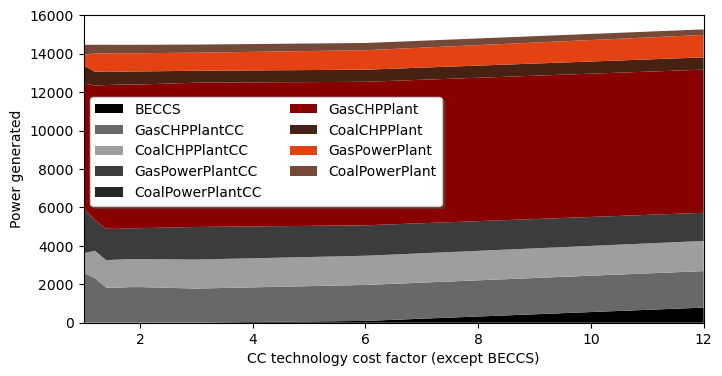

In [13]:
file_name = "Results inv_cost"
file_num = [1.0,1.2,1.4,1.6,1.8,2.0,3.0,6.0,12.0]
csv_name = "production.csv"
column = 'Technology'
expr = "Fuel == 'Power'"
category = ["BECCS","GasCHPPlantCC","CoalCHPPlantCC","GasPowerPlantCC","CoalPowerPlantCC","GasCHPPlant","CoalCHPPlant","GasPowerPlant","CoalPowerPlant"]
color_map = ["#000000","#686868","#9E9E9E","#3C3C3C","#282828","#880000","#472111","#e54213","#754937"]

x = np.asarray(file_num)
y = create_array(file_name,file_num,csv_name,column,category,expr=expr)

# plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.stackplot(x, y, colors = color_map, labels = category)
ax.set(xlim=(1.0, 12.0), xlabel="CC technology cost factor (except BECCS)", ylabel="Power generated")
            
plt.gca()

reverse_legend(ax)

plt.legend(loc=(0.01, 0.38), ncol=2, fancybox=True, shadow=True)

plt.savefig('inv_cost_Power.svg')

no value for BECCS in 1.0
no value for CoalPowerPlantCC in 1.0
no value for BECCS in 0.8
no value for CoalPowerPlantCC in 0.8
no value for CoalPowerPlantCC in 0.6
no value for CoalPowerPlantCC in 0.4
no value for CoalCHPPlantCC in 0.2
no value for CoalPowerPlantCC in 0.2


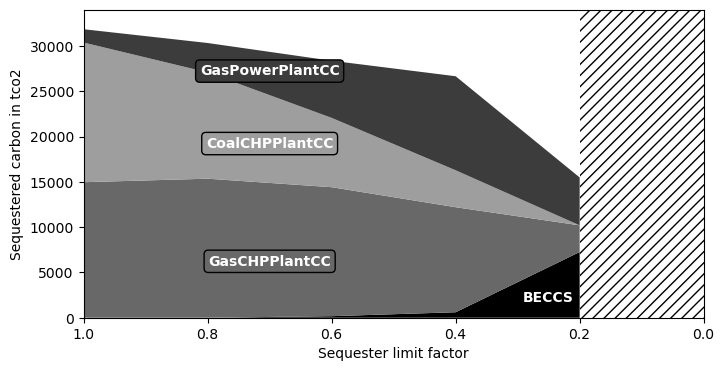

In [14]:
file_name = "Results seq_lim"
file_num = [1.0,0.8,0.6,0.4,0.2]
csv_name = "sequester.csv"
column = 'Technology'
category = ["BECCS","GasCHPPlantCC","CoalCHPPlantCC","GasPowerPlantCC","CoalPowerPlantCC"]
color_map = ["#000000","#686868","#9E9E9E","#3C3C3C","#282828"]

x = np.asarray(file_num)
y = create_array(file_name,file_num,csv_name,column,category)

# plot
fig, ax = plt.subplots(figsize=(8, 4))

ax.stackplot(x, y, colors = color_map)

ax.set(xlim=(0, 1), ylim=(0,34000), xlabel="Sequester limit factor", ylabel="Sequestered carbon in tco2")
ax.fill_between([0,0.2],35000,fc="white",hatch='///')

ax.annotate('BECCS',(0.25,3000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#000000"))
ax.annotate("GasCHPPlantCC",(0.7,7000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#686868"))
ax.annotate("CoalCHPPlantCC",(0.7,20000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#9E9E9E"))
ax.annotate("GasPowerPlantCC",(0.7,28000),color="white", weight='bold',ha="center", va="top",
           bbox=dict(boxstyle="round",fc="#3C3C3C"))

plt.gca().invert_xaxis()

plt.savefig('seq_lim_CO2.svg')

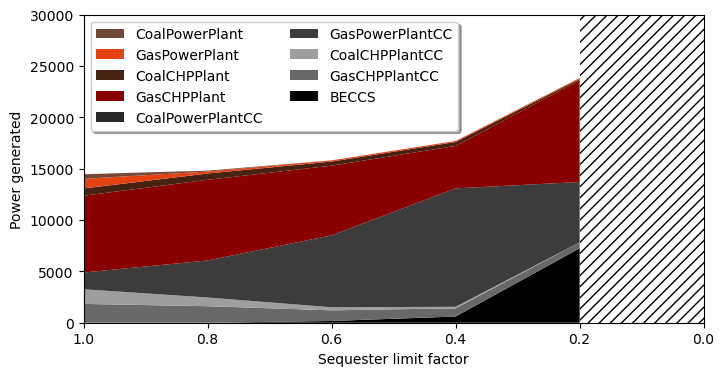

In [15]:
file_name = "Results seq_lim"
file_num = [1.0,0.8,0.6,0.4,0.2]
csv_name = "production.csv"
column = 'Technology'
expr = "Fuel == 'Power'"
category = ["BECCS","GasCHPPlantCC","CoalCHPPlantCC","GasPowerPlantCC","CoalPowerPlantCC","GasCHPPlant","CoalCHPPlant","GasPowerPlant","CoalPowerPlant"]
color_map = ["#000000","#686868","#9E9E9E","#3C3C3C","#282828","#880000","#472111","#e54213","#754937"]

x = np.asarray(file_num)
y = create_array(file_name,file_num,csv_name,column,category,expr=expr)

# plot
fig, ax = plt.subplots(figsize=(8, 4))

ax.stackplot(x, y, colors = color_map, labels = category)

ax.set(xlim=(0, 1), ylim=(0,30000), xlabel="Sequester limit factor", ylabel="Power generated")
ax.fill_between([0,0.2],35000,fc="white",hatch='///')

plt.gca().invert_xaxis()

reverse_legend(ax)

plt.savefig('seq_lim_Power.svg')

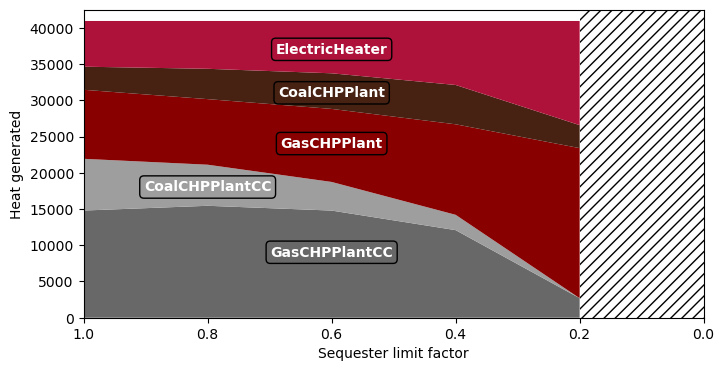

In [16]:
file_name = "Results seq_lim"
file_num = [1.0,0.8,0.6,0.4,0.2]
csv_name = "production.csv"
column = 'Technology'
expr = "Fuel == 'Heat'"
category = ["GasCHPPlantCC","CoalCHPPlantCC","GasCHPPlant","CoalCHPPlant","ElectricHeater"]
color_map = ["#686868","#9E9E9E","#880000","#472111","#ae123a"]

x = np.asarray(file_num)
y = create_array(file_name,file_num,csv_name,column,category,expr=expr)

# plot
fig, ax = plt.subplots(figsize=(8, 4))

ax.stackplot(x, y, colors = color_map, labels = category)

ax.set(xlim=(0, 1), ylim=(0,42500), xlabel="Sequester limit factor", ylabel="Heat generated")
ax.fill_between([0,0.2],42500,fc="white",hatch='///')

ax.annotate("GasCHPPlantCC",(0.6,10000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#686868"))
ax.annotate("CoalCHPPlantCC",(0.8,19000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#9E9E9E"))
ax.annotate("GasCHPPlant",(0.6,25000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#880000"))
ax.annotate("CoalCHPPlant",(0.6,32000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#472111"))
ax.annotate("ElectricHeater",(0.6,38000),color="white", weight='bold',ha="center", va="top",
           bbox=dict(boxstyle="round",fc="#ae123a"))

plt.gca().invert_xaxis()

#reverse_legend(ax)

plt.savefig('seq_lim_Heat.svg')

no value for BECCS in 1.0
no value for GasPowerPlantCC in 1.0
no value for CoalPowerPlantCC in 1.0
no value for BECCS in 0.8
no value for GasPowerPlantCC in 0.8
no value for CoalPowerPlantCC in 0.8
no value for BECCS in 0.6
no value for GasPowerPlantCC in 0.6
no value for CoalPowerPlantCC in 0.6
no value for GasPowerPlantCC in 0.4
no value for CoalPowerPlantCC in 0.4
no value for CoalCHPPlantCC in 0.2
no value for GasPowerPlantCC in 0.2
no value for CoalPowerPlantCC in 0.2


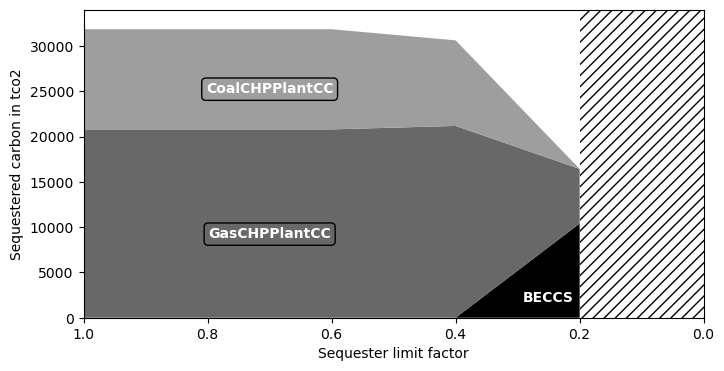

In [17]:
file_name = "Results test_trade seq_lim"
file_num = [1.0,0.8,0.6,0.4,0.2]
csv_name = "sequester.csv"
column = 'Technology'
category = ["BECCS","GasCHPPlantCC","CoalCHPPlantCC","GasPowerPlantCC","CoalPowerPlantCC"]
color_map = ["#000000","#686868","#9E9E9E","#3C3C3C","#282828"]

x = np.asarray(file_num)
y = create_array(file_name,file_num,csv_name,column,category)

# plot
fig, ax = plt.subplots(figsize=(8, 4))

ax.stackplot(x, y, colors = color_map)

ax.set(xlim=(0, 1),ylim=(0,34000), xlabel="Sequester limit factor", ylabel="Sequestered carbon in tco2")
ax.fill_between([0,0.2],35000,fc="white",hatch='///')

ax.annotate('BECCS',(0.25,3000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#000000"))
ax.annotate("GasCHPPlantCC",(0.7,10000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#686868"))
ax.annotate("CoalCHPPlantCC",(0.7,26000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#9E9E9E"))

plt.gca().invert_xaxis()

plt.savefig('seq_lim_trade_CO2.svg')

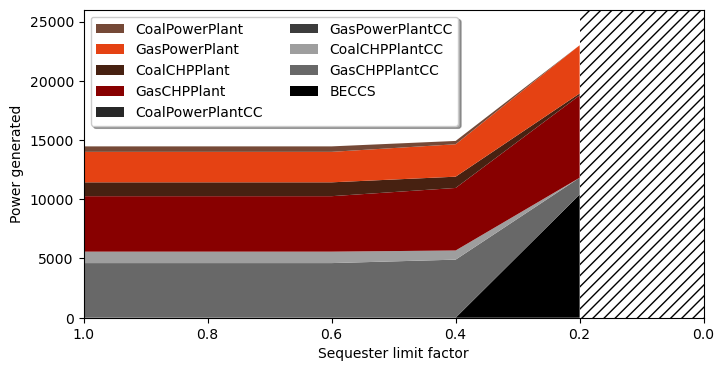

In [18]:
file_name = "Results test_trade seq_lim"
file_num = [1.0,0.8,0.6,0.4,0.2]
csv_name = "production.csv"
column = 'Technology'
expr = "Fuel == 'Power'"
category = ["BECCS","GasCHPPlantCC","CoalCHPPlantCC","GasPowerPlantCC","CoalPowerPlantCC","GasCHPPlant","CoalCHPPlant","GasPowerPlant","CoalPowerPlant"]
color_map = ["#000000","#686868","#9E9E9E","#3C3C3C","#282828","#880000","#472111","#e54213","#754937"]

x = np.asarray(file_num)
y = create_array(file_name,file_num,csv_name,column,category,expr=expr)

# plot
fig, ax = plt.subplots(figsize=(8, 4))

ax.stackplot(x, y, colors = color_map, labels = category)

ax.set(xlim=(0, 1), ylim=(0,26000), xlabel="Sequester limit factor", ylabel="Power generated")
ax.fill_between([0,0.2],30000,fc="white",hatch='///')

plt.gca().invert_xaxis()

reverse_legend(ax)

plt.savefig('seq_lim_trade_Power.svg')

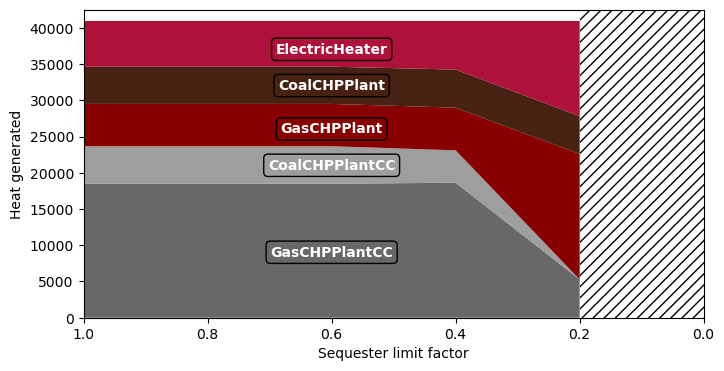

In [19]:
file_name = "Results test_trade seq_lim"
file_num = [1.0,0.8,0.6,0.4,0.2]
csv_name = "production.csv"
column = 'Technology'
expr = "Fuel == 'Heat'"
category = ["GasCHPPlantCC","CoalCHPPlantCC","GasCHPPlant","CoalCHPPlant","ElectricHeater"]
color_map = ["#686868","#9E9E9E","#880000","#472111","#ae123a"]

x = np.asarray(file_num)
y = create_array(file_name,file_num,csv_name,column,category,expr=expr)

# plot
fig, ax = plt.subplots(figsize=(8, 4))

ax.stackplot(x, y, colors = color_map, labels = category)

ax.set(xlim=(0, 1), ylim=(0,42500), xlabel="Sequester limit factor", ylabel="Heat generated")
ax.fill_between([0,0.2],42500,fc="white",hatch='///')

ax.annotate("GasCHPPlantCC",(0.6,10000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#686868"))
ax.annotate("CoalCHPPlantCC",(0.6,22000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#9E9E9E"))
ax.annotate("GasCHPPlant",(0.6,27000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#880000"))
ax.annotate("CoalCHPPlant",(0.6,33000),color="white", weight='bold',ha="center", va="top",
            bbox=dict(boxstyle="round",fc="#472111"))
ax.annotate("ElectricHeater",(0.6,38000),color="white", weight='bold',ha="center", va="top",
           bbox=dict(boxstyle="round",fc="#ae123a"))

plt.gca().invert_xaxis()

#reverse_legend(ax)

plt.savefig('seq_lim_trade_Heat.svg')